In [3]:
import sys
sys.path.append("../../helper")
from AnalysisHelper import helper

import pyupbit
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

In [4]:
print(pyupbit.get_tickers(fiat='KRW'))


['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-XRP', 'KRW-ETC', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLYX', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-HIFI', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 'KRW-SSX', 'KRW-META', 'KRW-FCT2', 'KRW-CB

In [5]:
pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])


{'KRW-BTC': 38555000.0, 'KRW-ETH': 2436000.0}

minute1, minute3, minute5, minute10, minute15, minute30, minute60, minute240, day, week, month

open: 시가, high: 고가, low: 저가, close: 종가, 거래량: volume, 거래량을 원화로 환산한 가치: value



In [7]:
ticker = 'KRW-BTC'
interval = 'day'
to  = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
df = pyupbit.get_ohlcv(ticker=ticker , interval = interval, to = to, count = count)
df.head()

,open,high,low,close,volume,value
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11


In [8]:
df['price'] = (df['high'] + df['low']) / 2
df.head()

,open,high,low,close,volume,value,price
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11,53575000.0
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11,53821500.0
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11,54937500.0
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11,56752500.0
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11,56965000.0


In [9]:
helper.set_datetime_index(df, inplace = True)

#### 데이터 검정
이상치는 보이지만 데이터 자체가 실제 거래 데이터이므로 정상 데이터로 판단함.

결측치 수: 0


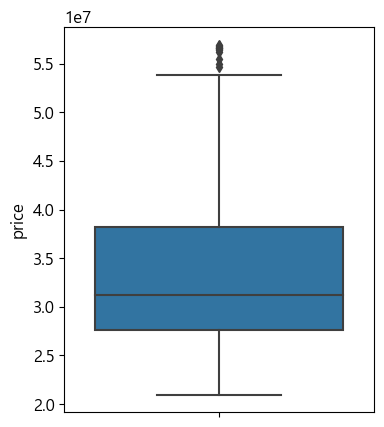

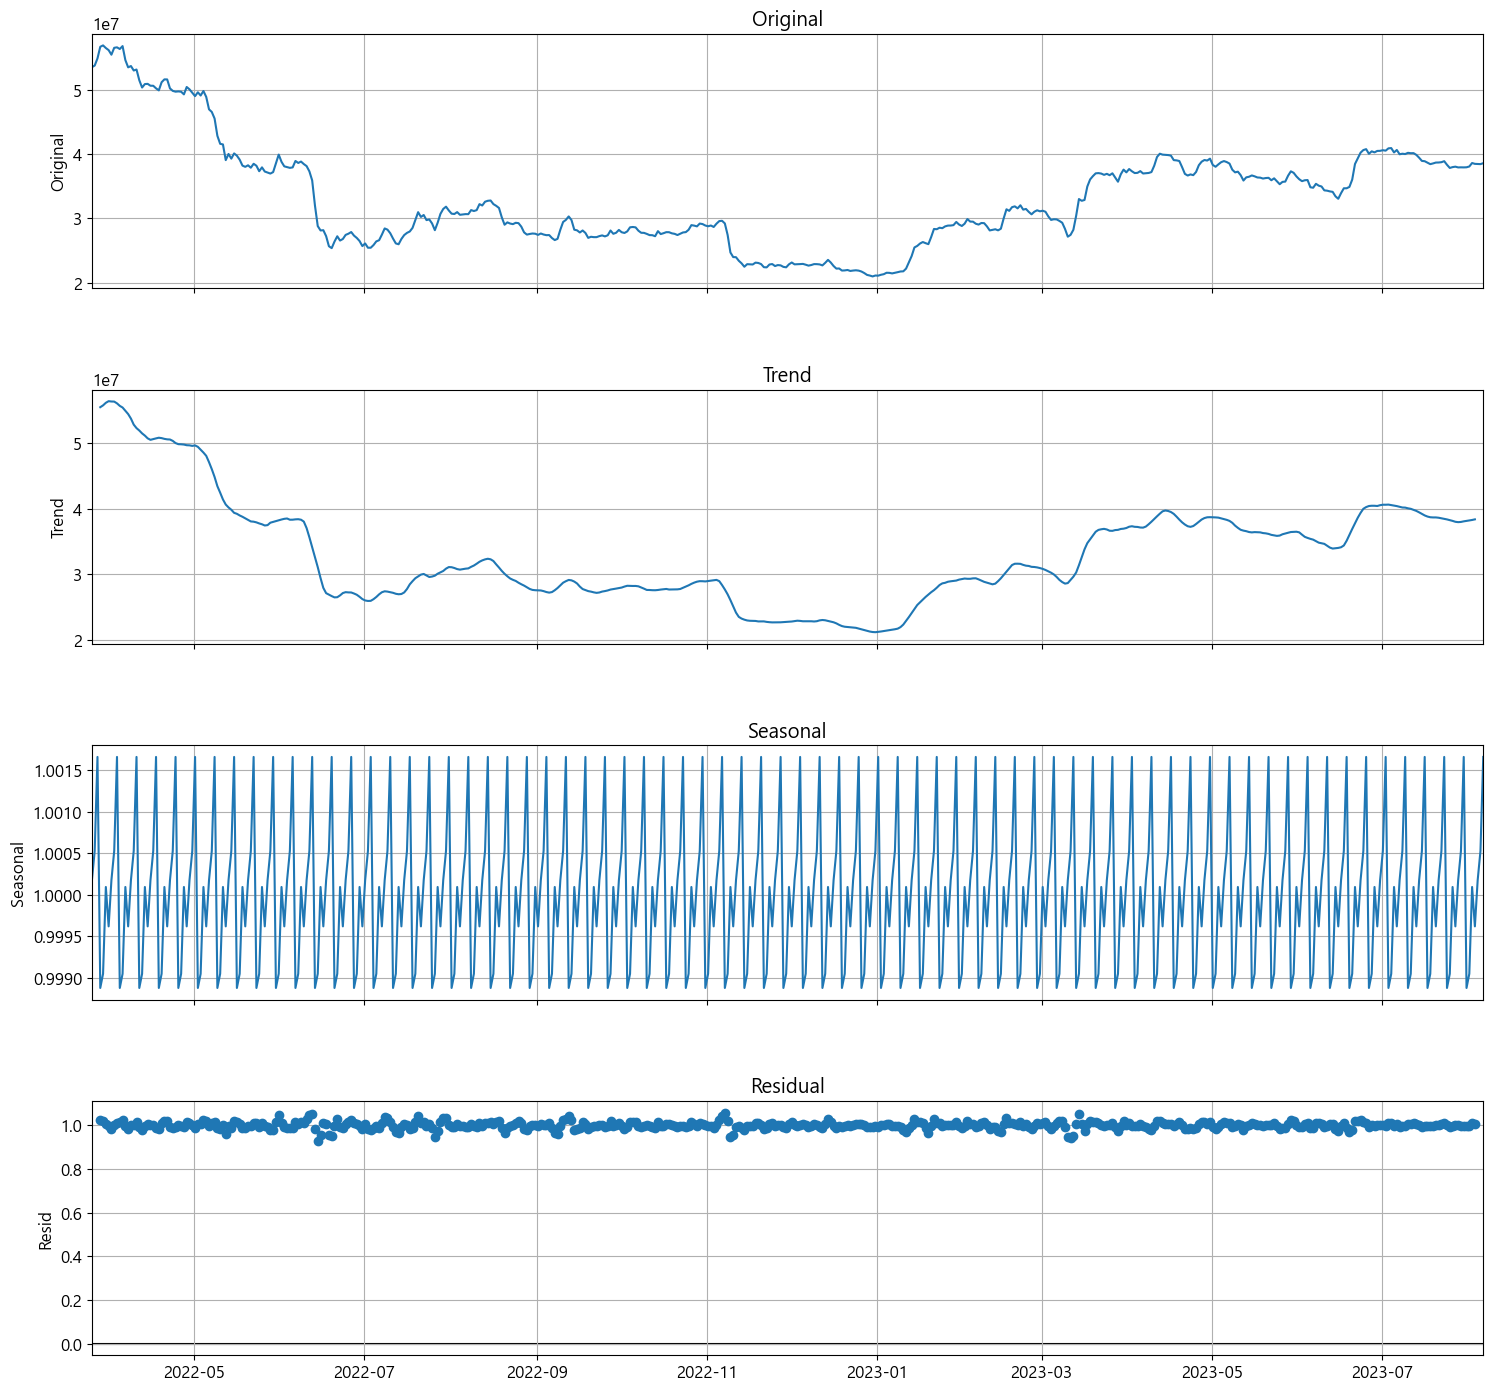

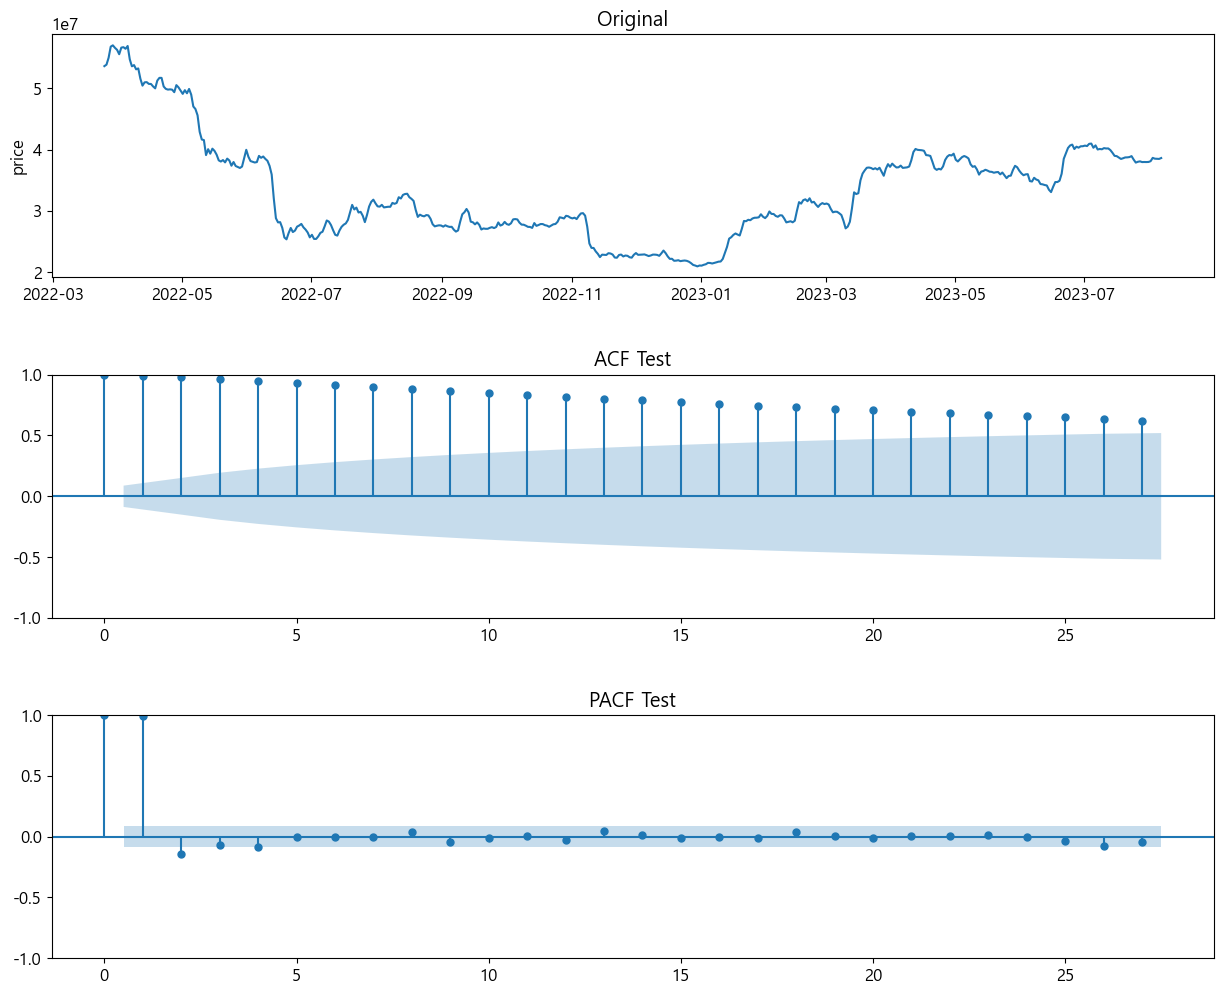

=========== 원본 데이터 ===========
+------------------------------------+-----------+
| ADF Test                           |           |
|------------------------------------+-----------|
| 검정통계량(ADF Statistic)          |  -3.07508 |
| 유의수준(p-value)                  | 0.0284529 |
| 최적차수(num of lags)              |         3 |
| 관측치 개수(num of observations)   |       496 |
| 기각값(Critical Values) 1%         |   -3.4436 |
| 기각값(Critical Values) 5%         |  -2.86738 |
| 기각값(Critical Values) 10%        |  -2.56988 |
| 데이터 정상성 여부(0=Flase,1=True) |         1 |
+------------------------------------+-----------+


In [10]:
helper.exp_time_data(df, 'price', 'm', max_diff = 10)

In [11]:
model = ARIMA(df['price'], order=(1,1,0), seasonal_order = (1,1,0,7))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                           price   No. Observations:                  500
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7461.894
Date:                         Mon, 07 Aug 2023   AIC                          14929.788
Time:                                 13:35:37   BIC                          14942.384
Sample:                             03-25-2022   HQIC                         14934.734
                                  - 08-06-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0420      0.005      7.769      0.000       0.031       0.053
ar.S.L7       -0.0844      0.004    -21.001      0.000     

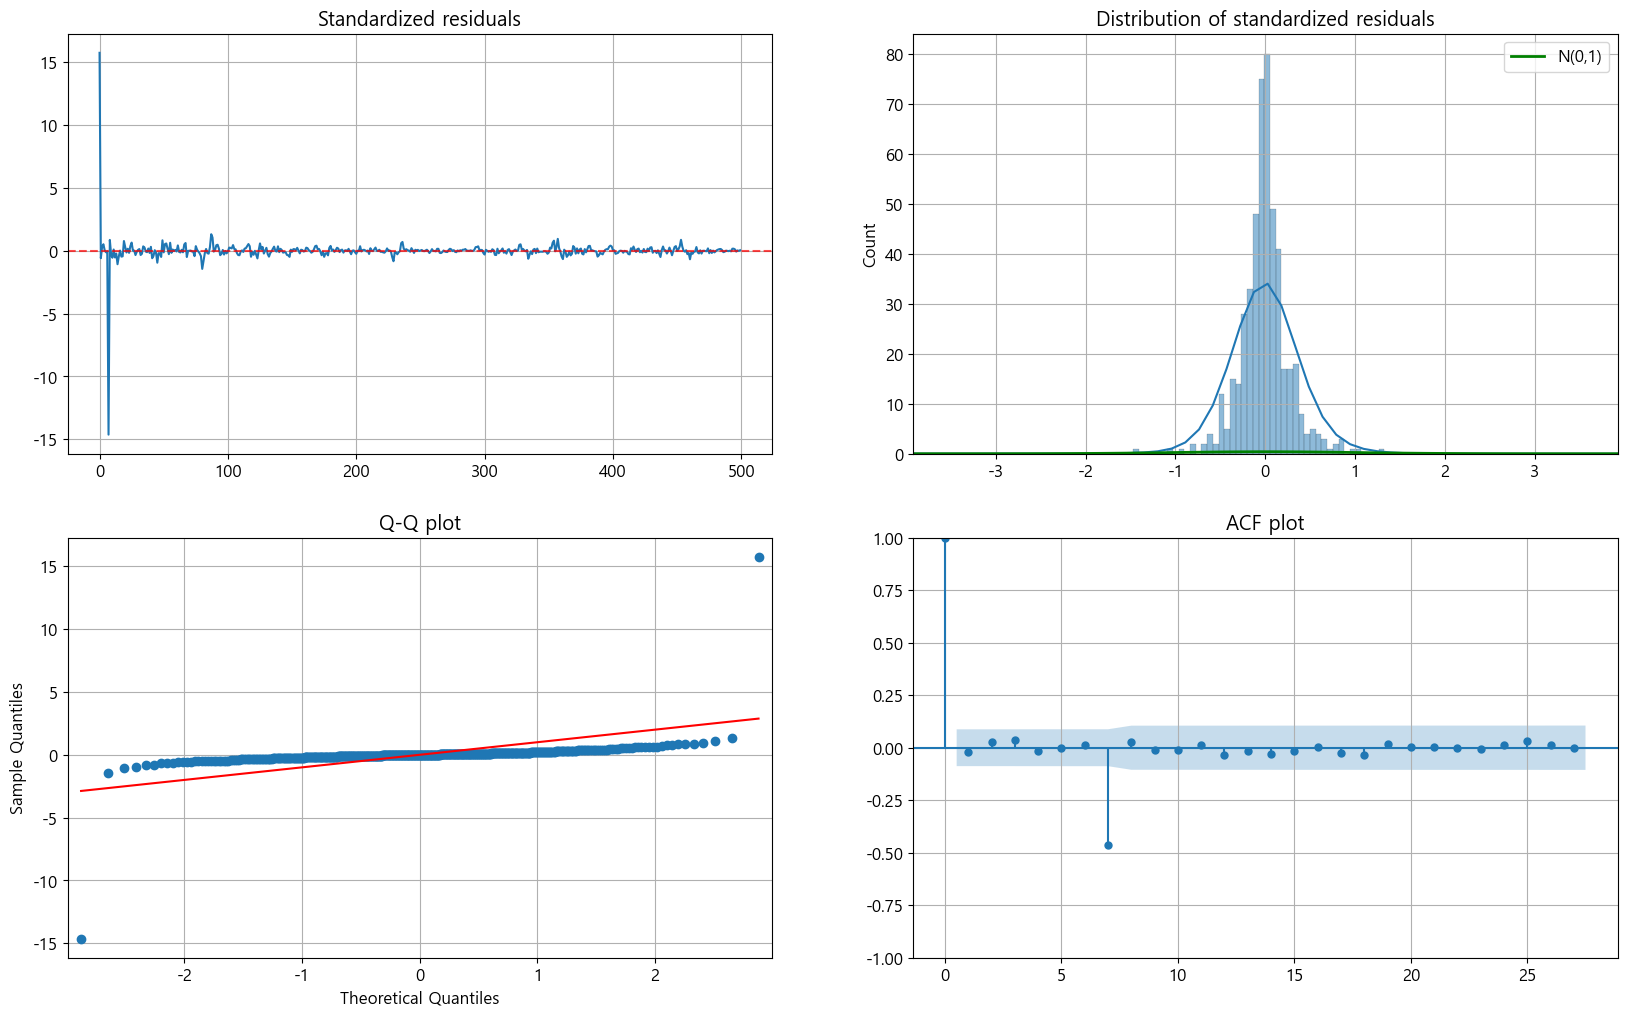

In [12]:
helper.arima_diagnostics(fit.resid)


In [13]:
fv = fit.fittedvalues
fv.head()

2022-03-25 09:00:00    0.000000e+00
2022-03-26 09:00:00    5.582250e+07
2022-03-27 09:00:00    5.383184e+07
2022-03-28 09:00:00    5.498430e+07
2022-03-29 09:00:00    5.682831e+07
Freq: D, dtype: float64

In [14]:
fc = fit.forecast(30)
fc.head()

2023-08-07 09:00:00    3.858298e+07
2023-08-08 09:00:00    3.865642e+07
2023-08-09 09:00:00    3.916127e+07
2023-08-10 09:00:00    3.904907e+07
2023-08-11 09:00:00    3.901622e+07
Freq: D, Name: predicted_mean, dtype: float64

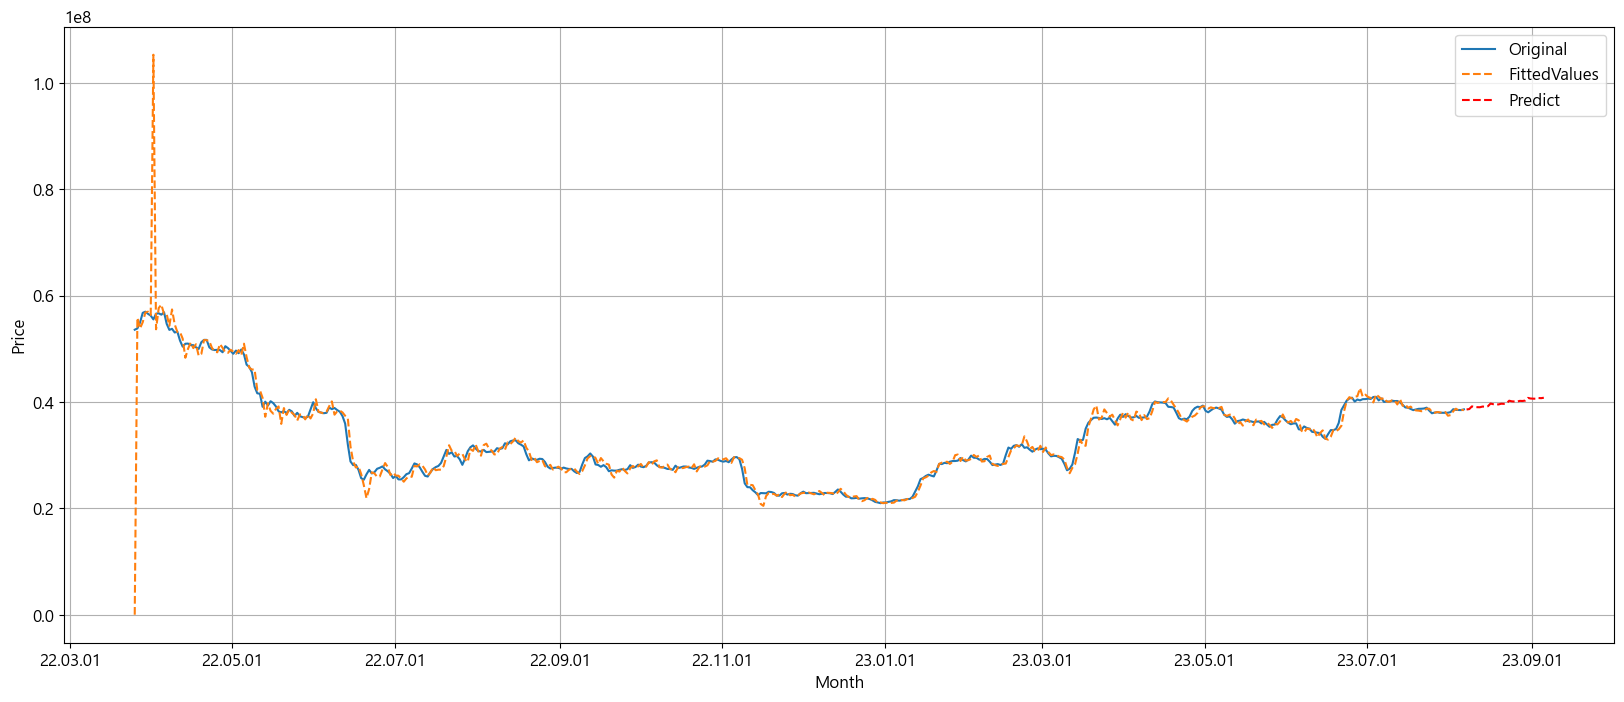

In [15]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

In [18]:
my_p = 1                # AR의 차수 (검증한  결과를 활용)
my_d = 1                # 차분 횟수         same
my_q = 0                # MA의 차수       same
my_s = 7                 # 계절성 주기 

model = auto_arima(
                y = df['price'],
                start_p = 0,
                max_p = my_p,
                d = my_d,
                start_q = 0,
                max_q = my_q,
                seasonal = True,
                m = my_s,
                start_P = 0,
                max_P = my_p,
                D = my_d,
                start_Q = 0,
                max_Q = my_q,
                trace = True
)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14956.004, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14929.788, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14957.743, Time=0.03 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=14949.560, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=14931.767, Time=0.13 sec

Best model:  ARIMA(1,1,0)(1,1,0)[7]          
Total fit time: 0.456 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  500
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7461.894
Date:                           Mon, 07 Aug 2023   AIC                          14929.788
Time:                                   13:42:26   BIC                          14942.384
Sample:                               03-25-2022   HQIC                         14934.734
                                    - 08-06-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0420      0.005      7.769      0.000       0.031       0.053
ar.S.L7       -0.0844      0.004    -21.001      0.000      -0.092      -0.077
sigma2      8.058e+11   1.15e-16   7.03e+27      0.000    8.06e+11    8.06e+11
===================================================================================
Ljung-Box (L1) (Q):                  54.67   Jarque-Bera (JB):               328.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

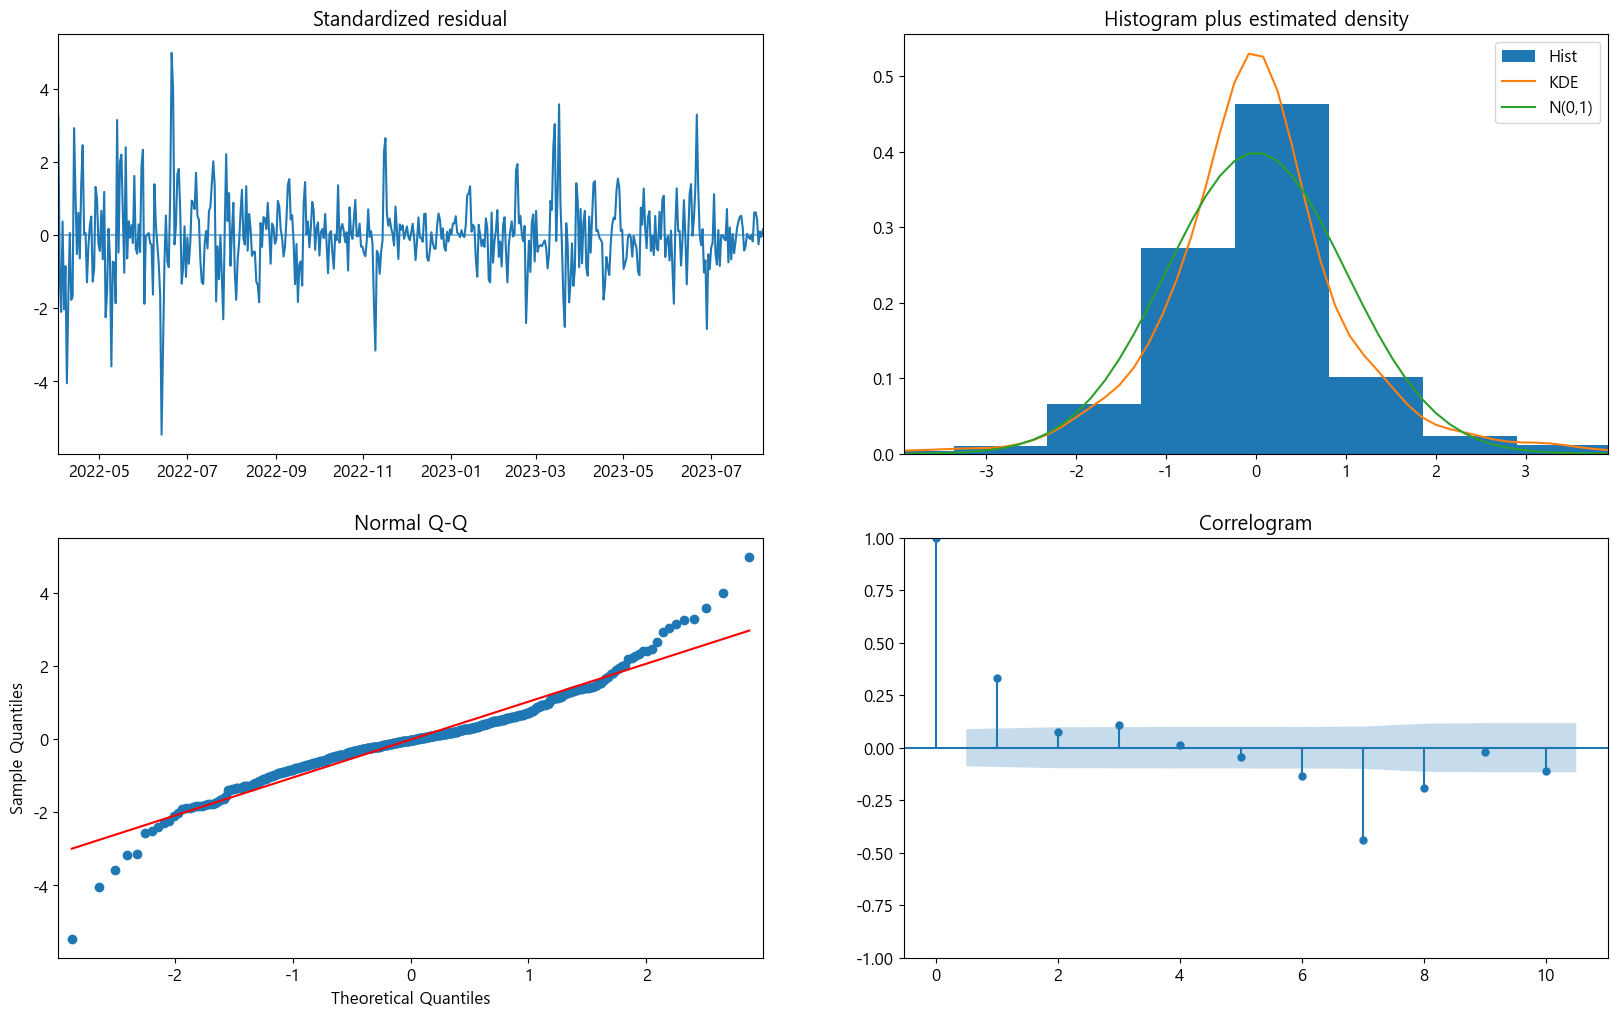

In [19]:
model.plot_diagnostics(figsize=(20, 12))
plt.show()

In [20]:
fv = model.fittedvalues()
fv.head()


2022-03-25 09:00:00    0.000000e+00
2022-03-26 09:00:00    5.582250e+07
2022-03-27 09:00:00    5.383184e+07
2022-03-28 09:00:00    5.498430e+07
2022-03-29 09:00:00    5.682831e+07
Freq: D, dtype: float64

In [21]:
fc = model.predict(n_periods=30)
fc.head()


2023-08-07 09:00:00    3.858298e+07
2023-08-08 09:00:00    3.865642e+07
2023-08-09 09:00:00    3.916127e+07
2023-08-10 09:00:00    3.904907e+07
2023-08-11 09:00:00    3.901622e+07
Freq: D, dtype: float64

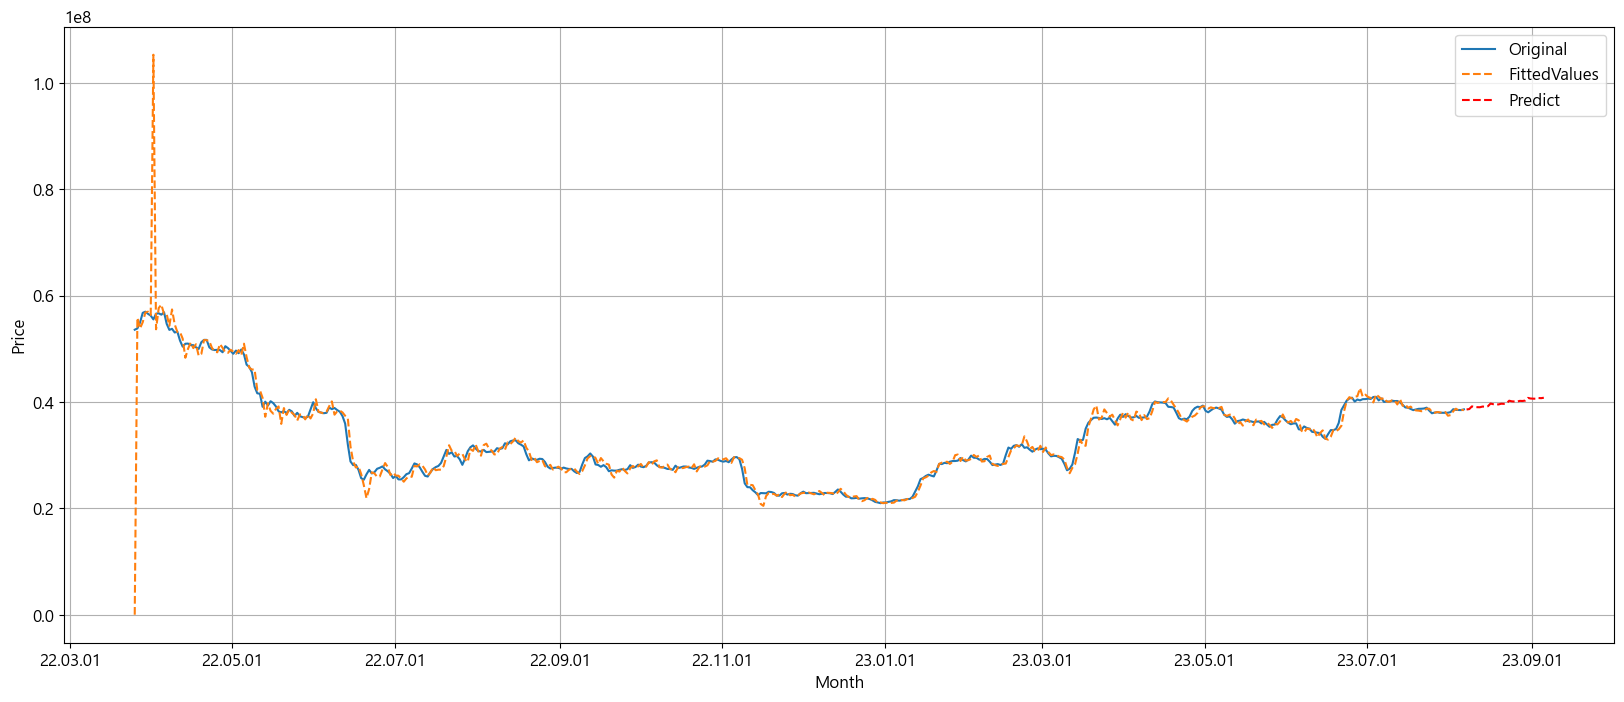

In [22]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()